In [2]:
import string
import secrets

class Base62Encoder:
    def __init__(self):
        self.base62chars = string.digits + string.ascii_lowercase + string.ascii_uppercase

    def encode(self, number):
        if number == 0:
            return self.base62chars[0]
        base62 = ''
        base = len(self.base62chars)
        while number:
            number, i = divmod(number, base)
            base62 = self.base62chars[i] + base62
        return base62

class URLShortener:
    def __init__(self):
        self.url_map = {}
        self.counter = secrets.randbelow(100000000) + 1  # Start counter from a random value
        self.encoder = Base62Encoder()

    def shorten_url(self, long_url):
        # Generate a unique ID for the long URL
        url_id = self.counter
        self.counter += 1
        short_hash = self.encoder.encode(url_id)
        self.url_map[short_hash] = long_url
        short_url = f"http://short.url/{short_hash}"
        print("Shortened URL hash:", short_hash)
        return short_url


    def expand_url(self, short_url):
        # Extract the hash from the short URL
        short_hash = short_url.split("/")[-1]
        
        # Retrieve the long URL from the mapping
        long_url = self.url_map.get(short_hash)
        
        return long_url if long_url else "URL not found"

# Example usage:
shortener = URLShortener()
long_url = "https://www.example.com/very/long/url"
short_url = shortener.shorten_url(long_url)
short_hash = short_url.split("/")[-1] 
print("Shortened URL hash:", short_hash.lstrip("0"))  
print("Shortened URL:", short_url)
print("Expanded URL:", shortener.expand_url(short_url))


Shortened URL hash: 2tyd2
Shortened URL hash: 2tyd2
Shortened URL: http://short.url/2tyd2
Expanded URL: https://www.example.com/very/long/url


In [18]:
from PIL import Image
import os

def resize_images(input_folder, output_folder, size=(256, 256)):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all files in the input folder
    files = os.listdir(input_folder)

    for file in files:
        # Check if the file is an image
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            input_path = os.path.join(input_folder, file)
            output_path = os.path.join(output_folder, file)

            # Open and resize the image using BILINEAR resampling
            with Image.open(input_path) as img:
                resized_img = img.resize(size, Image.BILINEAR)

                # Save the resized image
                resized_img.save(output_path)

if __name__ == "__main__":
    # Set the input and output folder paths
    input_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads"
    output_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_resized"

    # Resize images and save them in the output folder
    resize_images(input_folder, output_folder)



In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the paths for the image dataset folder and the folders to store blurred and noised images
image_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/dataset2_resized22"
blurred_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/BlurredImages1"
noised_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/NoisedImages"

# Function to apply blur to the image
def apply_blur(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size, 0)

# Function to add random noise to the image
def add_noise(image, noise_level=0.1):
    noise = np.random.normal(loc=0, scale=1, size=image.shape)
    noisy_image = np.clip(image + noise_level * noise, 0, 255).astype(np.uint8)
    return noisy_image

# Create folders if they don't exist
os.makedirs(blurred_folder, exist_ok=True)
os.makedirs(noised_folder, exist_ok=True)

# Process images in the dataset folder
for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Apply blur and save the result
    blurred_image = apply_blur(image, kernel_size=(25, 25))
    blurred_image_path = os.path.join(blurred_folder, filename)
    cv2.imwrite(blurred_image_path, blurred_image)
    
    # Add noise and save the result
    noisy_image = add_noise(image, noise_level=50)
    noisy_image_path = os.path.join(noised_folder, filename)
    cv2.imwrite(noisy_image_path, noisy_image)

print("Blurred and noised images saved successfully.")


Blurred and noised images saved successfully.


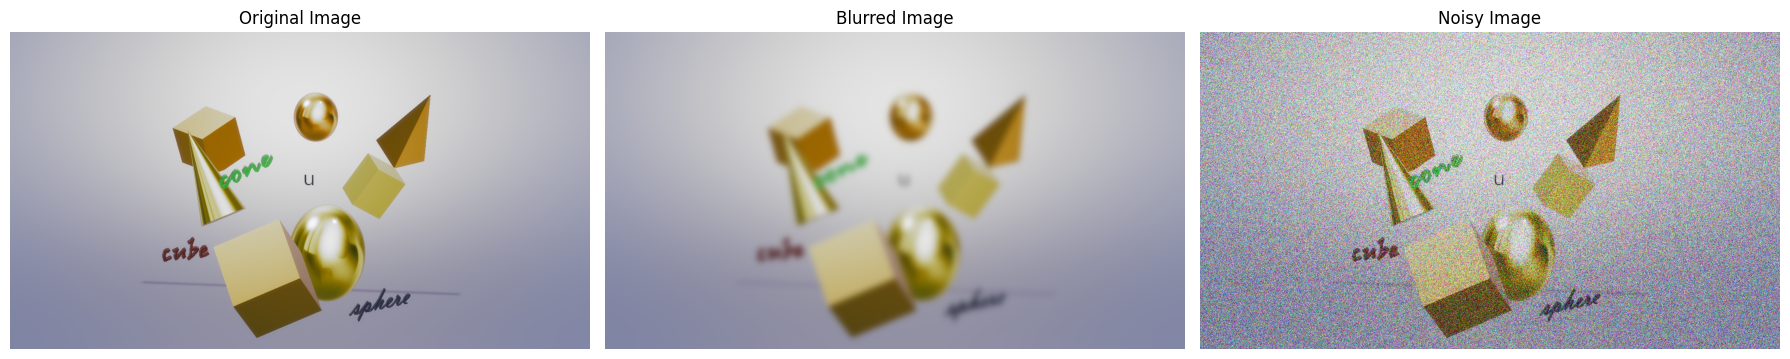

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
image = cv2.imread(image_path)

# Function to apply blur to the image
def apply_blur(image, kernel_size=(50, 50)):
    return cv2.GaussianBlur(image, kernel_size, 0)

# Function to add random noise to the image
def add_noise(image, noise_level=0.1):
    # Generate random noise
    noise = np.random.normal(loc=0, scale=1, size=image.shape)
    
    # Add noise to the image
    noisy_image = np.clip(image + noise_level * noise, 0, 255).astype(np.uint8)
    
    return noisy_image

# Apply blur and noise
blurred_image = apply_blur(image, kernel_size=(55, 55))
noisy_image = add_noise(image, noise_level=80)

# Display images in plots
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Blurred Image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

# Noisy Image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import cv2
import math
import os

# Define the source and destination paths
source_path = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/dataset4_resized/2011_005470.jpg"
output_directory = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/rotated"

# Read the image
img = cv2.imread(source_path)

# Change size of image
scale_percent = 200 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# 2D to 3D (projection)  , and -> rotation point - center point (origin point)
proj2dto3d = np.array([[1,0,-img.shape[1]/2],
                      [0,1,-img.shape[0]/2],
                      [0,0,0],
                      [0,0,1]], np.float32)

# 3D matrices in x, y, z 
rx = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]], np.float32)  # No rotation

ry = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]], np.float32)

rz = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]], np.float32)  # No rotation

trans = np.array([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,1,400],   # 400 to move the image in z axis 
                  [0,0,0,1]], np.float32)

proj3dto2d = np.array([[200,0,img.shape[1]/2,0],
                        [0,200,img.shape[0]/2,0],
                        [0,0,1,0]], np.float32)

x = 0.0
y = 0.0
z = 0.0

for i in range(0, 50):
    ax = float(x * (math.pi / 180.0))
    ay = float(y * (math.pi / 180.0))
    az = float(z * (math.pi / 180.0))
    
    rx[1,1] = math.cos(ax)
    rx[1,2] = -math.sin(ax)
    rx[2,1] = math.sin(ax)
    rx[2,2] = math.cos(ax)
    
    ry[0,0] = math.cos(ay)
    ry[0,2] = -math.sin(ay)
    ry[2,0] = math.sin(ay)
    ry[2,2] = math.cos(ay)
    
    rz[0,0] = math.cos(az)
    rz[0,1] = -math.sin(az)
    rz[1,0] = math.sin(az)
    rz[1,1] = math.cos(az)
    
    r = rx.dot(ry).dot(rz)
    final = proj3dto2d.dot(trans.dot(r.dot(proj2dto3d)))
    
    dst = cv2.warpPerspective(img, final, (img.shape[1],img.shape[0]), None, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,255,255))
    
    # Save the rotated image
    output_path = os.path.join(output_directory, f"rotated{i}.png")
    cv2.imwrite(output_path, dst)
    
    y += 3  # increase y angle by 3

cv2.waitKey(0)


-1

U-NET ENCODING (BLURRED, NOISED AND TILTED)

Epoch 1/10
65/65 [==============================] - 1310s 20s/step - loss: 4.4785 - val_loss: 3.4054
Epoch 2/10
65/65 [==============================] - 1427s 22s/step - loss: 2.0815 - val_loss: 2.0359
Epoch 3/10
65/65 [==============================] - 2395s 37s/step - loss: 1.3441 - val_loss: 1.5415
Epoch 4/10
65/65 [==============================] - 1457s 22s/step - loss: 1.0660 - val_loss: 1.2548
Epoch 5/10
65/65 [==============================] - 1538s 24s/step - loss: 0.9087 - val_loss: 1.2237
Epoch 6/10
65/65 [==============================] - 1597s 25s/step - loss: 0.8004 - val_loss: 1.1012
Epoch 7/10
65/65 [==============================] - 1843s 29s/step - loss: 0.7139 - val_loss: 1.0657
Epoch 8/10
65/65 [==============================] - 1797s 28s/step - loss: 0.6443 - val_loss: 1.0135
Epoch 9/10
65/65 [==============================] - 1180s 18s/step - loss: 0.5900 - val_loss: 0.9679
Epoch 10/10
65/65 [==============================] - 2368s 37s/step - loss: 0.5511 - val_lo

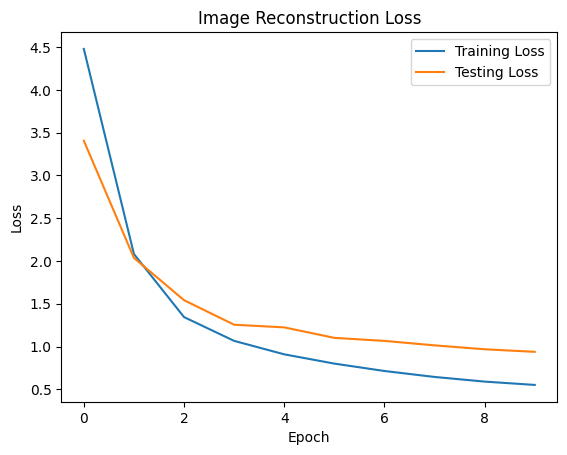

1/1 [==============================] - 1s 529ms/step
L2 Loss: 0.0031643037


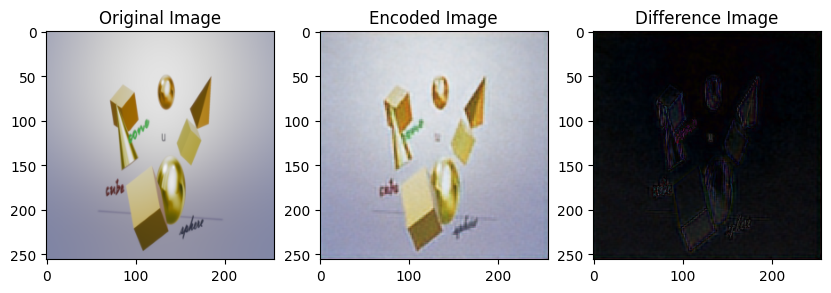

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

# Set your train and test image folder paths
train_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ResizedJPEG1"
test_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/TEST_resized"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(256, 256), batch_size=16):
    images = []
    filenames = os.listdir(folder_path)

    for i in range(0, len(filenames), batch_size):
        batch_files = filenames[i:i+batch_size]
        batch_images = []

        for filename in batch_files:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)

        images.extend(batch_images)

    return np.array(images)

# Function to convert a base62 hash to binary representation
def hash_to_binary(short_hash):
    num = int(short_hash, 36)
    binary = bin(num)[2:].zfill(62)                                                                                                                                                                                                                                                                                                                               
    return [int(bit) for bit in binary]

# Function to create unet model with perceptual loss
def create_unet_model(input_shape=(256, 256, 3), message_length=8):
    # Define inputs
    image_input = keras.Input(shape=input_shape)
    message_input = keras.Input(shape=(message_length,))

    # Preprocess message
    processed_message = layers.Dense(np.prod(input_shape))(message_input)
    processed_message = layers.Reshape(input_shape)(processed_message)

    # Concatenate message with image
    concatenated_input = layers.Concatenate(axis=-1)([image_input, processed_message])

    # Encoder
    encoded = layers.Conv2D(64, 3, activation='relu', padding='same')(concatenated_input)
    encoded = layers.MaxPooling2D()(encoded)
    encoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    encoded = layers.MaxPooling2D()(encoded)

    # Decoder
    decoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(64, 3, activation='relu', padding='same')(decoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(decoded)

    # Define model
    model = keras.Model(inputs=[image_input, message_input], outputs=decoded)
    return model

# Create the unet model
unet_model = create_unet_model()

message = hash_to_binary(short_hash)

# Define the JND (Just Noticeable Difference) threshold
jnd_threshold = 0.1

# Create VGG model outside of the loss function
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_conv4').output)

# Define the custom JND loss function
def custom_jnd_loss(jnd_threshold, loss_model):
    def jnd_loss(y_true, y_pred):
        true_features = loss_model(y_true)
        pred_features = loss_model(y_pred)
        feature_loss = tf.keras.losses.mean_squared_error(true_features, pred_features)
        jnd_loss = tf.where(feature_loss < jnd_threshold, 0.5 * feature_loss, feature_loss - 0.5 * jnd_threshold)
        return jnd_loss
    return jnd_loss

# Compile the model with the custom JND loss function
unet_model.compile(optimizer='adam', loss=custom_jnd_loss(jnd_threshold, loss_model))

# Load images from the train and test folders
train_images = load_and_preprocess_images(train_folder)
test_images = load_and_preprocess_images(test_folder)

# Train the model
history = autoencoder_model.fit([train_images, np.array([message] * len(train_images))], train_images, epochs=20, batch_size=16, validation_data=([test_images, np.array([message] * len(test_images))], test_images))

# Plot image reconstruction loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Image Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on a single test image
test_image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
test_image = img_to_array(load_img(test_image_path, target_size=(256, 256))) / 255.0
test_message = np.random.randint(2, size=(1, 8))  # Random binary bit string of length 8
predicted_image = unet_model.predict([np.expand_dims(test_image, axis=0), test_message])[0]

# Calculate L2 loss
l2_loss = np.mean(np.square(test_image - predicted_image))

print("L2 Loss:", l2_loss)

# Visual comparison of original and reconstructed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_image)
plt.title('Encoded Image')

plt.subplot(1, 3, 3)
difference_image = np.abs(test_image - predicted_image)
plt.imshow(difference_image)
plt.title('Difference Image')

plt.show()


Epoch 1/10
65/65 [==============================] - 1147s 18s/step - loss: 4.7639 - val_loss: 0.7289
Epoch 2/10
65/65 [==============================] - 1132s 17s/step - loss: 2.3268 - val_loss: 0.3284
Epoch 3/10
65/65 [==============================] - 1179s 18s/step - loss: 1.3231 - val_loss: 0.1752
Epoch 4/10
65/65 [==============================] - 1211s 19s/step - loss: 0.9867 - val_loss: 0.1580
Epoch 5/10
65/65 [==============================] - 1130s 17s/step - loss: 0.8168 - val_loss: 0.1628
Epoch 6/10
65/65 [==============================] - 1111s 17s/step - loss: 0.6930 - val_loss: 0.2393
Epoch 7/10
65/65 [==============================] - 1104s 17s/step - loss: 0.6471 - val_loss: 0.1402
Epoch 8/10
65/65 [==============================] - 1125s 17s/step - loss: 0.5480 - val_loss: 0.1524
Epoch 9/10
65/65 [==============================] - 1201s 18s/step - loss: 0.5082 - val_loss: 0.1319
Epoch 10/10
65/65 [==============================] - 1121s 17s/step - loss: 0.4618 - val_lo

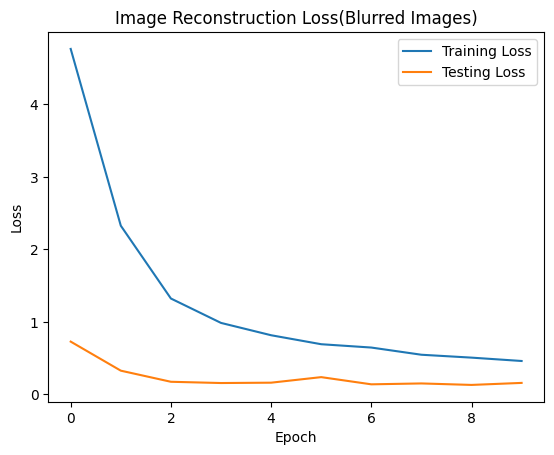

1/1 [==============================] - 0s 298ms/step
L2 Loss: 0.0021641369


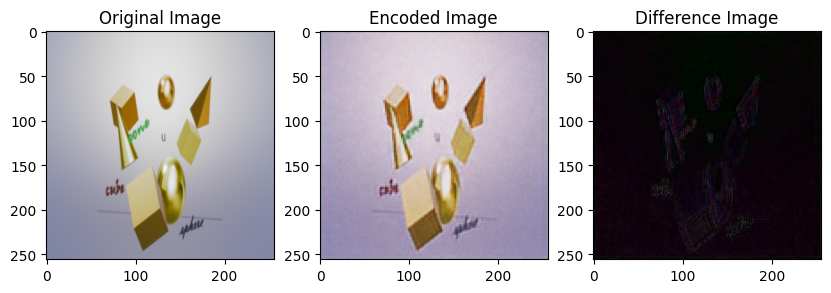

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

# Set your train and test image folder paths
train_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ResizedJPEG1"
test_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/BlurredImages1"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(256, 256), batch_size=16):
    images = []
    filenames = os.listdir(folder_path)

    for i in range(0, len(filenames), batch_size):
        batch_files = filenames[i:i+batch_size]
        batch_images = []

        for filename in batch_files:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)

        images.extend(batch_images)

    return np.array(images)

# Function to convert a base62 hash to binary representation
def hash_to_binary(short_hash):
    num = int(short_hash, 36)
    binary = bin(num)[2:].zfill(62)
    return [int(bit) for bit in binary]

# Function to create unet model with perceptual loss
def create_unet_model(input_shape=(256, 256, 3), message_length=8):
    # Define inputs
    image_input = keras.Input(shape=input_shape)
    message_input = keras.Input(shape=(message_length,))

    # Preprocess message
    processed_message = layers.Dense(np.prod(input_shape))(message_input)
    processed_message = layers.Reshape(input_shape)(processed_message)

    # Concatenate message with image
    concatenated_input = layers.Concatenate(axis=-1)([image_input, processed_message])

    # Encoder
    encoded = layers.Conv2D(64, 3, activation='relu', padding='same')(concatenated_input)
    encoded = layers.MaxPooling2D()(encoded)
    encoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    encoded = layers.MaxPooling2D()(encoded)

    # Decoder
    decoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(64, 3, activation='relu', padding='same')(decoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(decoded)

    # Define model
    model = keras.Model(inputs=[image_input, message_input], outputs=decoded)
    return model

# Create the unet model
unet_model = create_unet_model()

message = hash_to_binary(short_hash)

# Define the JND (Just Noticeable Difference) threshold
jnd_threshold = 0.1

# Create VGG model outside of the loss function
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_conv4').output)

# Define the custom JND loss function
def custom_jnd_loss(jnd_threshold, loss_model):
    def jnd_loss(y_true, y_pred):
        true_features = loss_model(y_true)
        pred_features = loss_model(y_pred)
        feature_loss = tf.keras.losses.mean_squared_error(true_features, pred_features)
        jnd_loss = tf.where(feature_loss < jnd_threshold, 0.5 * feature_loss, feature_loss - 0.5 * jnd_threshold)
        return jnd_loss
    return jnd_loss

# Compile the model with the custom JND loss function
unet_model.compile(optimizer='adam', loss=custom_jnd_loss(jnd_threshold, loss_model))

# Load images from the train and test folders
train_images = load_and_preprocess_images(train_folder)
test_images = load_and_preprocess_images(test_folder)

# Train the model
history = unet_model.fit([train_images, np.array([message] * len(train_images))], train_images, epochs=20, batch_size=16, validation_data=([test_images, np.array([message] * len(test_images))], test_images))

# Plot image reconstruction loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Image Reconstruction Loss(Blurred Images)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on a single test image
test_image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
test_image = img_to_array(load_img(test_image_path, target_size=(256, 256))) / 255.0
test_message = np.random.randint(2, size=(1, 8))  # Random binary bit string of length 8
predicted_image = unet_model.predict([np.expand_dims(test_image, axis=0), test_message])[0]

# Calculate L2 loss
l2_loss = np.mean(np.square(test_image - predicted_image))

print("L2 Loss:", l2_loss)

# Visual comparison of original and reconstructed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_image)
plt.title('Encoded Image')

plt.subplot(1, 3, 3)
difference_image = np.abs(test_image - predicted_image)
plt.imshow(difference_image)
plt.title('Difference Image')

plt.show()


Epoch 1/10
65/65 [==============================] - 1031s 16s/step - loss: 5.2515 - val_loss: 1.6282
Epoch 2/10
65/65 [==============================] - 1009s 16s/step - loss: 2.8495 - val_loss: 1.1039
Epoch 3/10
65/65 [==============================] - 980s 15s/step - loss: 1.9159 - val_loss: 0.7074
Epoch 4/10
65/65 [==============================] - 884s 14s/step - loss: 1.2577 - val_loss: 0.5484
Epoch 5/10
65/65 [==============================] - 886s 14s/step - loss: 0.9701 - val_loss: 0.4920
Epoch 6/10
65/65 [==============================] - 885s 14s/step - loss: 0.8240 - val_loss: 0.4433
Epoch 7/10
65/65 [==============================] - 885s 14s/step - loss: 0.7139 - val_loss: 0.4331
Epoch 8/10
65/65 [==============================] - 889s 14s/step - loss: 0.6302 - val_loss: 0.3860
Epoch 9/10
65/65 [==============================] - 884s 14s/step - loss: 0.5757 - val_loss: 0.3682
Epoch 10/10
65/65 [==============================] - 883s 14s/step - loss: 0.5201 - val_loss: 0.33

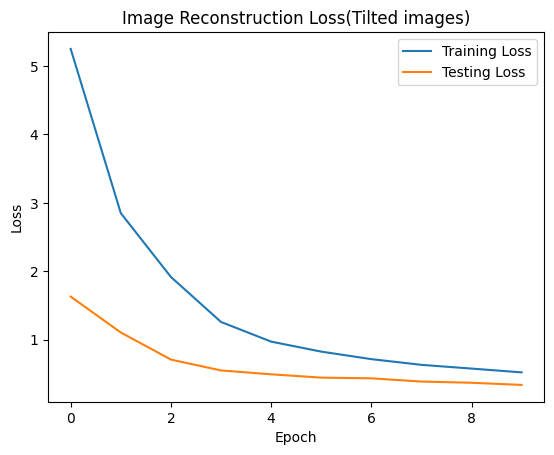

1/1 [==============================] - 0s 247ms/step
L2 Loss: 0.003484632


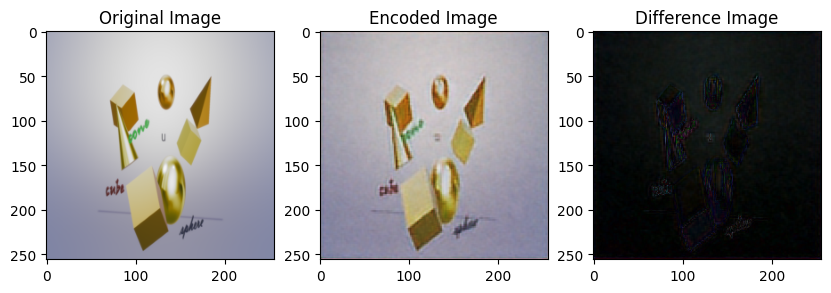

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

# Set your train and test image folder paths
train_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ResizedJPEG1"
test_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/rotated"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(256, 256), batch_size=16):
    images = []
    filenames = os.listdir(folder_path)

    for i in range(0, len(filenames), batch_size):
        batch_files = filenames[i:i+batch_size]
        batch_images = []

        for filename in batch_files:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)

        images.extend(batch_images)

    return np.array(images)

# Function to convert a base62 hash to binary representation
def hash_to_binary(short_hash):
    num = int(short_hash, 36)
    binary = bin(num)[2:].zfill(62)
    return [int(bit) for bit in binary]

# Function to create unet model with perceptual loss
def create_unet_model(input_shape=(256, 256, 3), message_length=8):
    # Define inputs
    image_input = keras.Input(shape=input_shape)
    message_input = keras.Input(shape=(message_length,))

    # Preprocess message
    processed_message = layers.Dense(np.prod(input_shape))(message_input)
    processed_message = layers.Reshape(input_shape)(processed_message)

    # Concatenate message with image
    concatenated_input = layers.Concatenate(axis=-1)([image_input, processed_message])

    # Encoder
    encoded = layers.Conv2D(64, 3, activation='relu', padding='same')(concatenated_input)
    encoded = layers.MaxPooling2D()(encoded)
    encoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    encoded = layers.MaxPooling2D()(encoded)

    # Decoder
    decoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(64, 3, activation='relu', padding='same')(decoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(decoded)

    # Define model
    model = keras.Model(inputs=[image_input, message_input], outputs=decoded)
    return model

# Create the unet model
unet_model = create_unet_model()

message = hash_to_binary(short_hash)

# Define the JND (Just Noticeable Difference) threshold
jnd_threshold = 0.1

# Create VGG model outside of the loss function
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_conv4').output)

# Define the custom JND loss function
def custom_jnd_loss(jnd_threshold, loss_model):
    def jnd_loss(y_true, y_pred):
        true_features = loss_model(y_true)
        pred_features = loss_model(y_pred)
        feature_loss = tf.keras.losses.mean_squared_error(true_features, pred_features)
        jnd_loss = tf.where(feature_loss < jnd_threshold, 0.5 * feature_loss, feature_loss - 0.5 * jnd_threshold)
        return jnd_loss
    return jnd_loss

# Compile the model with the custom JND loss function
unet_model.compile(optimizer='adam', loss=custom_jnd_loss(jnd_threshold, loss_model))

# Load images from the train and test folders
train_images = load_and_preprocess_images(train_folder)
test_images = load_and_preprocess_images(test_folder)

# Train the model
history = unet_model.fit([train_images, np.array([message] * len(train_images))], train_images, epochs=20, batch_size=16, validation_data=([test_images, np.array([message] * len(test_images))], test_images))

# Plot image reconstruction loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Image Reconstruction Loss(Tilted images)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on a single test image
test_image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
test_image = img_to_array(load_img(test_image_path, target_size=(256, 256))) / 255.0
test_message = np.random.randint(2, size=(1, 8))  # Random binary bit string of length 8
predicted_image = unet_model.predict([np.expand_dims(test_image, axis=0), test_message])[0]

# Calculate L2 loss
l2_loss = np.mean(np.square(test_image - predicted_image))

print("L2 Loss:", l2_loss)

# Visual comparison of original and reconstructed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_image)
plt.title('Encoded Image')

plt.subplot(1, 3, 3)
difference_image = np.abs(test_image - predicted_image)
plt.imshow(difference_image)
plt.title('Difference Image')

plt.show()


Epoch 1/10
65/65 [==============================] - 1000s 15s/step - loss: 5.0542 - val_loss: 3.6472
Epoch 2/10
65/65 [==============================] - 996s 15s/step - loss: 2.8264 - val_loss: 3.4542
Epoch 3/10
65/65 [==============================] - 1006s 15s/step - loss: 2.1348 - val_loss: 3.0134
Epoch 4/10
65/65 [==============================] - 986s 15s/step - loss: 1.6651 - val_loss: 2.5069
Epoch 5/10
65/65 [==============================] - 994s 15s/step - loss: 1.1631 - val_loss: 2.6032
Epoch 6/10
65/65 [==============================] - 973s 15s/step - loss: 0.8613 - val_loss: 2.1434
Epoch 7/10
65/65 [==============================] - 970s 15s/step - loss: 0.7042 - val_loss: 2.1563
Epoch 8/10
65/65 [==============================] - 971s 15s/step - loss: 0.6144 - val_loss: 2.4787
Epoch 9/10
65/65 [==============================] - 980s 15s/step - loss: 0.5545 - val_loss: 2.3705
Epoch 10/10
65/65 [==============================] - 974s 15s/step - loss: 0.5176 - val_loss: 2.14

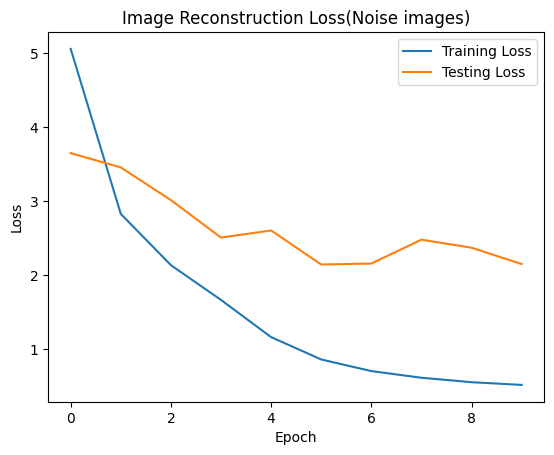

1/1 [==============================] - 0s 387ms/step
L2 Loss: 0.0035878439


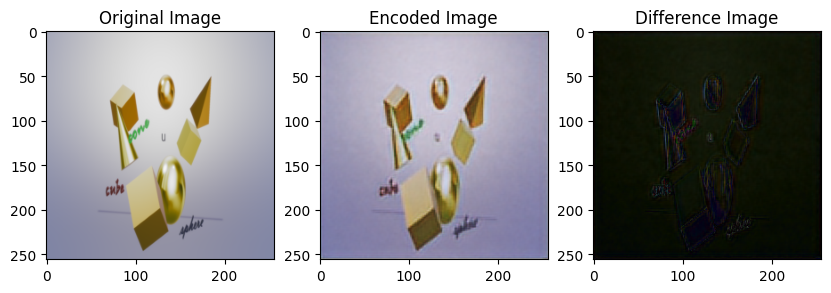

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

# Set your train and test image folder paths
train_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ResizedJPEG1"
test_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/NoisedImages"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(256, 256), batch_size=16):
    images = []
    filenames = os.listdir(folder_path)

    for i in range(0, len(filenames), batch_size):
        batch_files = filenames[i:i+batch_size]
        batch_images = []

        for filename in batch_files:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)

        images.extend(batch_images)

    return np.array(images)

# Function to convert a base62 hash to binary representation
def hash_to_binary(short_hash):
    num = int(short_hash, 36)
    binary = bin(num)[2:].zfill(62)
    return [int(bit) for bit in binary]


# Function to create unet model with perceptual loss
def create_unet_model(input_shape=(256, 256, 3), message_length=8):
    # Define inputs
    image_input = keras.Input(shape=input_shape)
    message_input = keras.Input(shape=(message_length,))

    # Preprocess message
    processed_message = layers.Dense(np.prod(input_shape))(message_input)
    processed_message = layers.Reshape(input_shape)(processed_message)

    # Concatenate message with image
    concatenated_input = layers.Concatenate(axis=-1)([image_input, processed_message])

    # Encoder
    encoded = layers.Conv2D(64, 3, activation='relu', padding='same')(concatenated_input)
    encoded = layers.MaxPooling2D()(encoded)
    encoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    encoded = layers.MaxPooling2D()(encoded)

    # Decoder
    decoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(64, 3, activation='relu', padding='same')(decoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(decoded)

    # Define model
    model = keras.Model(inputs=[image_input, message_input], outputs=decoded)
    return model

# Create the unet model
unet_model = create_unet_model()

message = hash_to_binary(short_hash)

# Define the JND (Just Noticeable Difference) threshold
jnd_threshold = 0.1

# Create VGG model outside of the loss function
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_conv4').output)

# Define the custom JND loss function
def custom_jnd_loss(jnd_threshold, loss_model):
    def jnd_loss(y_true, y_pred):
        true_features = loss_model(y_true)
        pred_features = loss_model(y_pred)
        feature_loss = tf.keras.losses.mean_squared_error(true_features, pred_features)
        jnd_loss = tf.where(feature_loss < jnd_threshold, 0.5 * feature_loss, feature_loss - 0.5 * jnd_threshold)
        return jnd_loss
    return jnd_loss

# Compile the model with the custom JND loss function
unet_model.compile(optimizer='adam', loss=custom_jnd_loss(jnd_threshold, loss_model))

# Load images from the train and test folders
train_images = load_and_preprocess_images(train_folder)
test_images = load_and_preprocess_images(test_folder)

# Train the model
history = unet_model.fit([train_images, np.array([message] * len(train_images))], train_images, epochs=20, batch_size=16, validation_data=([test_images, np.array([message] * len(test_images))], test_images))

# Plot image reconstruction loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Image Reconstruction Loss(Noise images)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on a single test image
test_image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
test_image = img_to_array(load_img(test_image_path, target_size=(256, 256))) / 255.0
test_message = np.random.randint(2, size=(1, 8))  # Random binary bit string of length 8
predicted_image = unet_model.predict([np.expand_dims(test_image, axis=0), test_message])[0]

# Calculate L2 loss
l2_loss = np.mean(np.square(test_image - predicted_image))

print("L2 Loss:", l2_loss)

# Visual comparison of original and reconstructed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_image)
plt.title('Encoded Image')

plt.subplot(1, 3, 3)
difference_image = np.abs(test_image - predicted_image)
plt.imshow(difference_image)
plt.title('Difference Image')

plt.show()


Autoencoder (BLURRED, ROTATED AND NOISED)

Epoch 1/10
65/65 [==============================] - 959s 15s/step - loss: 4.7679 - val_loss: 0.5755
Epoch 2/10
65/65 [==============================] - 1037s 16s/step - loss: 1.9454 - val_loss: 0.2777
Epoch 3/10
65/65 [==============================] - 895s 14s/step - loss: 1.2219 - val_loss: 0.2506
Epoch 4/10
65/65 [==============================] - 887s 14s/step - loss: 0.9633 - val_loss: 0.1965
Epoch 5/10
65/65 [==============================] - 880s 14s/step - loss: 0.7882 - val_loss: 0.1809
Epoch 6/10
65/65 [==============================] - 880s 14s/step - loss: 0.6765 - val_loss: 0.1633
Epoch 7/10
65/65 [==============================] - 904s 14s/step - loss: 0.6051 - val_loss: 0.1749
Epoch 8/10
65/65 [==============================] - 1056s 16s/step - loss: 0.5405 - val_loss: 0.1784
Epoch 9/10
65/65 [==============================] - 991s 15s/step - loss: 0.5061 - val_loss: 0.1971
Epoch 10/10
65/65 [==============================] - 896s 14s/step - loss: 0.4918 - val_loss: 0.14

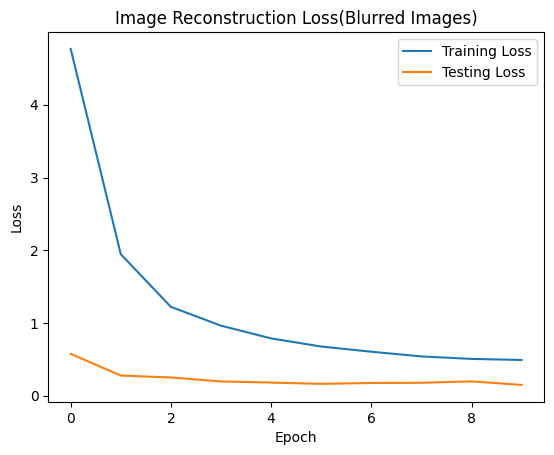

1/1 [==============================] - 0s 242ms/step
L2 Loss: 0.0013796514


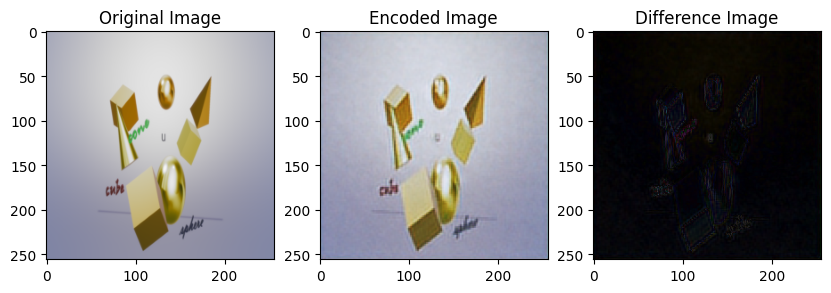

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

# Set your train and test image folder paths
train_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ResizedJPEG1"
test_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/BlurredImages1"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(256, 256), batch_size=16):
    images = []
    filenames = os.listdir(folder_path)

    for i in range(0, len(filenames), batch_size):
        batch_files = filenames[i:i+batch_size]
        batch_images = []

        for filename in batch_files:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)

        images.extend(batch_images)

    return np.array(images)

# Function to convert a base62 hash to binary representation
def hash_to_binary(short_hash):
    num = int(short_hash, 36)
    binary = bin(num)[2:].zfill(62)
    return [int(bit) for bit in binary]

# Function to create autoencoder model with perceptual loss
def create_autoencoder_model(input_shape=(256, 256, 3), message_length=8):
    # Define inputs
    image_input = keras.Input(shape=input_shape)
    message_input = keras.Input(shape=(message_length,))

    # Flatten the image
    flattened_image = layers.Flatten()(image_input)

    # Concatenate message with flattened image
    concatenated_input = layers.Concatenate()([flattened_image, message_input])

    # Encoder
    encoded = layers.Dense(128, activation='relu')(concatenated_input)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)

    # Decoder
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(np.prod(input_shape), activation='sigmoid')(decoded)

    # Reshape the decoded output
    decoded_output = layers.Reshape(input_shape)(decoded)

    # Define model
    model = keras.Model(inputs=[image_input, message_input], outputs=decoded_output)
    return model

# Create the autoencoder model
autoencoder_model = create_autoencoder_model()

message = hash_to_binary(short_hash)

# Define the JND (Just Noticeable Difference) threshold
jnd_threshold = 0.1

# Create VGG model outside of the loss function
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_conv4').output)

# Define the custom JND loss function
def custom_jnd_loss(jnd_threshold, loss_model):
    def jnd_loss(y_true, y_pred):
        true_features = loss_model(y_true)
        pred_features = loss_model(y_pred)
        feature_loss = tf.keras.losses.mean_squared_error(true_features, pred_features)
        jnd_loss = tf.where(feature_loss < jnd_threshold, 0.5 * feature_loss, feature_loss - 0.5 * jnd_threshold)
        return jnd_loss
    return jnd_loss

# Compile the model with the custom JND loss function
autoencoder_model.compile(optimizer='adam', loss=custom_jnd_loss(jnd_threshold, loss_model))

# Load images from the train and test folders
train_images = load_and_preprocess_images(train_folder)
test_images = load_and_preprocess_images(test_folder)

# Train the model
history = autoencoder_model.fit([train_images, np.array([message] * len(train_images))], train_images, epochs=20, batch_size=16, validation_data=([test_images, np.array([message] * len(test_images))], test_images))

# Plot image reconstruction loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Image Reconstruction Loss(Blurred Images)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on a single test image
test_image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
test_image = img_to_array(load_img(test_image_path, target_size=(256, 256))) / 255.0
test_message = np.random.randint(2, size=(1, 8))  # Random binary bit string of length 8
predicted_image = autoencoder_model.predict([np.expand_dims(test_image, axis=0), test_message])[0]

# Calculate L2 loss
l2_loss = np.mean(np.square(test_image - predicted_image))

print("L2 Loss:", l2_loss)

# Visual comparison of original and reconstructed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_image)
plt.title('Encoded Image')

plt.subplot(1, 3, 3)
difference_image = np.abs(test_image - predicted_image)
plt.imshow(difference_image)
plt.title('Difference Image')

plt.show()


Epoch 1/10
65/65 [==============================] - 910s 14s/step - loss: 4.2521 - val_loss: 3.2723
Epoch 2/10
65/65 [==============================] - 894s 14s/step - loss: 1.7524 - val_loss: 2.6383
Epoch 3/10
65/65 [==============================] - 893s 14s/step - loss: 1.1712 - val_loss: 2.6267
Epoch 4/10
65/65 [==============================] - 959s 15s/step - loss: 0.9401 - val_loss: 2.4987
Epoch 5/10
65/65 [==============================] - 1270s 20s/step - loss: 0.7861 - val_loss: 2.1907
Epoch 6/10
65/65 [==============================] - 2477s 38s/step - loss: 0.6914 - val_loss: 2.2615
Epoch 7/10
65/65 [==============================] - 1116s 17s/step - loss: 0.6535 - val_loss: 2.1744
Epoch 8/10
65/65 [==============================] - 935s 14s/step - loss: 0.5653 - val_loss: 2.0941
Epoch 9/10
65/65 [==============================] - 1062s 16s/step - loss: 0.4994 - val_loss: 2.2425
Epoch 10/10
65/65 [==============================] - 1146s 18s/step - loss: 0.4566 - val_loss: 2

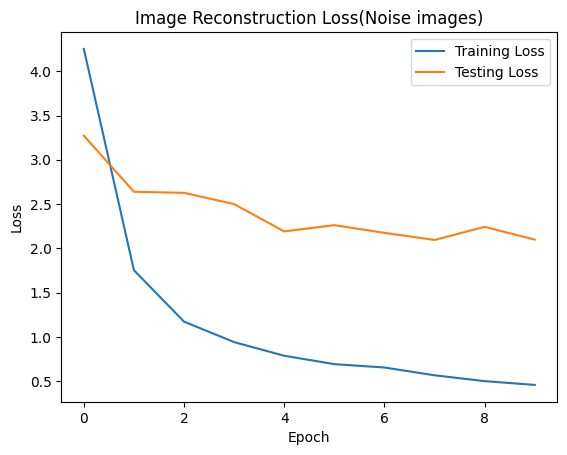

1/1 [==============================] - 1s 501ms/step
L2 Loss: 0.0013932608


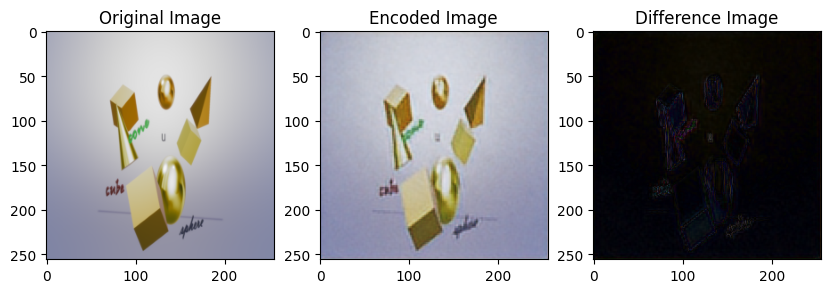

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

# Set your train and test image folder paths
train_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ResizedJPEG1"
test_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/NoisedImages"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(256, 256), batch_size=16):
    images = []
    filenames = os.listdir(folder_path)

    for i in range(0, len(filenames), batch_size):
        batch_files = filenames[i:i+batch_size]
        batch_images = []

        for filename in batch_files:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)

        images.extend(batch_images)

    return np.array(images)

# Function to convert a base62 hash to binary representation
def hash_to_binary(short_hash):
    num = int(short_hash, 36)
    binary = bin(num)[2:].zfill(62)
    return [int(bit) for bit in binary]


# Function to create autoencoder model with perceptual loss
def create_autoencoder_model(input_shape=(256, 256, 3), message_length=8):
    # Define inputs
    image_input = keras.Input(shape=input_shape)
    message_input = keras.Input(shape=(message_length,))

    # Flatten the image
    flattened_image = layers.Flatten()(image_input)

    # Concatenate message with flattened image
    concatenated_input = layers.Concatenate()([flattened_image, message_input])

    # Encoder
    encoded = layers.Dense(128, activation='relu')(concatenated_input)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)

    # Decoder
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(np.prod(input_shape), activation='sigmoid')(decoded)

    # Reshape the decoded output
    decoded_output = layers.Reshape(input_shape)(decoded)

    # Define model
    model = keras.Model(inputs=[image_input, message_input], outputs=decoded_output)
    return model

# Create the autoencoder model
autoencoder_model = create_autoencoder_model()

message = hash_to_binary(short_hash)

# Define the JND (Just Noticeable Difference) threshold
jnd_threshold = 0.1

# Create VGG model outside of the loss function
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_conv4').output)

# Define the custom JND loss function
def custom_jnd_loss(jnd_threshold, loss_model):
    def jnd_loss(y_true, y_pred):
        true_features = loss_model(y_true)
        pred_features = loss_model(y_pred)
        feature_loss = tf.keras.losses.mean_squared_error(true_features, pred_features)
        jnd_loss = tf.where(feature_loss < jnd_threshold, 0.5 * feature_loss, feature_loss - 0.5 * jnd_threshold)
        return jnd_loss
    return jnd_loss

# Compile the model with the custom JND loss function
autoencoder_model.compile(optimizer='adam', loss=custom_jnd_loss(jnd_threshold, loss_model))

# Load images from the train and test folders
train_images = load_and_preprocess_images(train_folder)
test_images = load_and_preprocess_images(test_folder)

# Train the model
history = autoencoder_model.fit([train_images, np.array([message] * len(train_images))], train_images, epochs=20, batch_size=16, validation_data=([test_images, np.array([message] * len(test_images))], test_images))

# Plot image reconstruction loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Image Reconstruction Loss(Blurred Images)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on a single test image
test_image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
test_image = img_to_array(load_img(test_image_path, target_size=(256, 256))) / 255.0
test_message = np.random.randint(2, size=(1, 8))  # Random binary bit string of length 8
predicted_image = autoencoder_model.predict([np.expand_dims(test_image, axis=0), test_message])[0]

# Calculate L2 loss
l2_loss = np.mean(np.square(test_image - predicted_image))

print("L2 Loss:", l2_loss)

# Visual comparison of original and reconstructed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_image)
plt.title('Encoded Image')

plt.subplot(1, 3, 3)
difference_image = np.abs(test_image - predicted_image)
plt.imshow(difference_image)
plt.title('Difference Image')

plt.show()


Epoch 1/10
65/65 [==============================] - 908s 14s/step - loss: 4.5316 - val_loss: 1.5378
Epoch 2/10
65/65 [==============================] - 1023s 16s/step - loss: 2.5740 - val_loss: 1.0974
Epoch 3/10
65/65 [==============================] - 1155s 18s/step - loss: 1.9374 - val_loss: 0.9040
Epoch 4/10
65/65 [==============================] - 1097s 17s/step - loss: 1.4292 - val_loss: 0.5861
Epoch 5/10
65/65 [==============================] - 1093s 17s/step - loss: 1.0153 - val_loss: 0.4764
Epoch 6/10
65/65 [==============================] - 1062s 16s/step - loss: 0.8063 - val_loss: 0.3717
Epoch 7/10
65/65 [==============================] - 1038s 16s/step - loss: 0.6847 - val_loss: 0.3468
Epoch 8/10
65/65 [==============================] - 1155s 18s/step - loss: 0.6026 - val_loss: 0.3286
Epoch 9/10
65/65 [==============================] - 1129s 17s/step - loss: 0.5272 - val_loss: 0.3206
Epoch 10/10
65/65 [==============================] - 992s 15s/step - loss: 0.4809 - val_loss

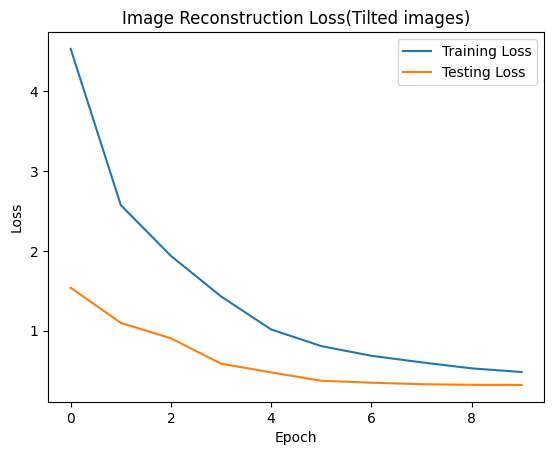

1/1 [==============================] - 0s 378ms/step
L2 Loss: 0.0038945274


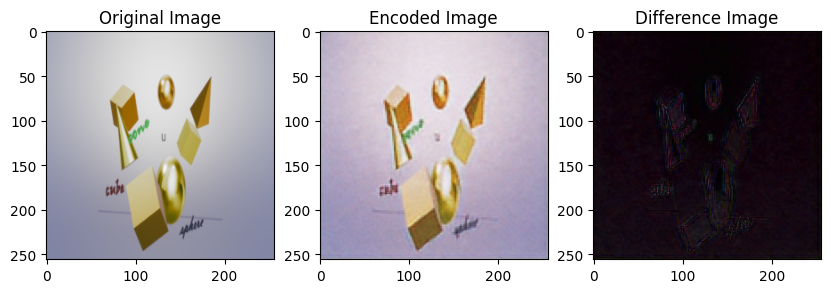

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

# Set your train and test image folder paths
train_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ResizedJPEG1"
test_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/VOC2012/rotated"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(256, 256), batch_size=16):
    images = []
    filenames = os.listdir(folder_path)

    for i in range(0, len(filenames), batch_size):
        batch_files = filenames[i:i+batch_size]
        batch_images = []

        for filename in batch_files:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)

        images.extend(batch_images)

    return np.array(images)


# Function to convert a base62 hash to binary representation
def hash_to_binary(short_hash):
    num = int(short_hash, 36)
    binary = bin(num)[2:].zfill(62)
    return [int(bit) for bit in binary]

# Function to create autoencoder model with perceptual loss
def create_autoencoder_model(input_shape=(256, 256, 3), message_length=8):
    # Define inputs
    image_input = keras.Input(shape=input_shape)
    message_input = keras.Input(shape=(message_length,))

    # Flatten the image
    flattened_image = layers.Flatten()(image_input)

    # Concatenate message with flattened image
    concatenated_input = layers.Concatenate()([flattened_image, message_input])

    # Encoder
    encoded = layers.Dense(128, activation='relu')(concatenated_input)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)

    # Decoder
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(np.prod(input_shape), activation='sigmoid')(decoded)

    # Reshape the decoded output
    decoded_output = layers.Reshape(input_shape)(decoded)

    # Define model
    model = keras.Model(inputs=[image_input, message_input], outputs=decoded_output)
    return model

# Create the autoencoder model
autoencoder_model = create_autoencoder_model()

message = hash_to_binary(short_hash)

# Define the JND (Just Noticeable Difference) threshold
jnd_threshold = 0.1

# Create VGG model outside of the loss function
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_conv4').output)

# Define the custom JND loss function
def custom_jnd_loss(jnd_threshold, loss_model):
    def jnd_loss(y_true, y_pred):
        true_features = loss_model(y_true)
        pred_features = loss_model(y_pred)
        feature_loss = tf.keras.losses.mean_squared_error(true_features, pred_features)
        jnd_loss = tf.where(feature_loss < jnd_threshold, 0.5 * feature_loss, feature_loss - 0.5 * jnd_threshold)
        return jnd_loss
    return jnd_loss

# Compile the model with the custom JND loss function
autoencoder_model.compile(optimizer='adam', loss=custom_jnd_loss(jnd_threshold, loss_model))

# Load images from the train and test folders
train_images = load_and_preprocess_images(train_folder)
test_images = load_and_preprocess_images(test_folder)

# Train the model
history = autoencoder_model.fit([train_images, np.array([message] * len(train_images))], train_images, epochs=20, batch_size=16, validation_data=([test_images, np.array([message] * len(test_images))], test_images))

# Plot image reconstruction loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Image Reconstruction Loss(Tilted Images)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on a single test image
test_image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
test_image = img_to_array(load_img(test_image_path, target_size=(256, 256))) / 255.0
test_message = np.random.randint(2, size=(1, 8))  # Random binary bit string of length 8
predicted_image = autoencoder_model.predict([np.expand_dims(test_image, axis=0), test_message])[0]

# Calculate L2 loss
l2_loss = np.mean(np.square(test_image - predicted_image))

print("L2 Loss:", l2_loss)

# Visual comparison of original and reconstructed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_image)
plt.title('Encoded Image')

plt.subplot(1, 3, 3)
difference_image = np.abs(test_image - predicted_image)
plt.imshow(difference_image)
plt.title('Difference Image')

plt.show()


Epoch 1/20
2/2 [==============================] - 34s 14s/step - loss: 7.1784 - val_loss: 6.8979
Epoch 2/20
2/2 [==============================] - 27s 13s/step - loss: 7.1641 - val_loss: 6.8900
Epoch 3/20
2/2 [==============================] - 29s 15s/step - loss: 7.1546 - val_loss: 6.8808
Epoch 4/20
2/2 [==============================] - 29s 14s/step - loss: 7.1418 - val_loss: 6.8683
Epoch 5/20
2/2 [==============================] - 29s 15s/step - loss: 7.1233 - val_loss: 6.8544
Epoch 6/20
2/2 [==============================] - 29s 14s/step - loss: 7.0977 - val_loss: 6.8252
Epoch 7/20
2/2 [==============================] - 30s 15s/step - loss: 7.0405 - val_loss: 6.7589
Epoch 8/20
2/2 [==============================] - 30s 15s/step - loss: 6.9116 - val_loss: 6.6675
Epoch 9/20
2/2 [==============================] - 30s 15s/step - loss: 6.6946 - val_loss: 6.5050
Epoch 10/20
2/2 [==============================] - 30s 15s/step - loss: 6.4370 - val_loss: 6.3426
Epoch 11/20
2/2 [============

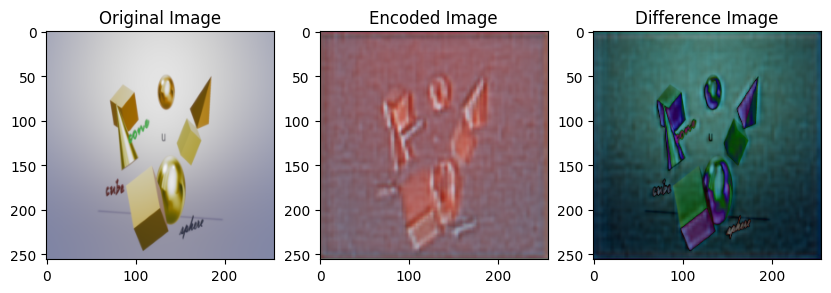

Encoded image saved at: C:/Encoded_3d.png


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from skimage.metrics import structural_similarity as ssim
import cv2

# Set your train and test image folder paths
train_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/RESIZED1"
test_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/RESIZED2"
dataset_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_resized"

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, target_size=(256, 256), batch_size=16):
    images = []
    filenames = os.listdir(folder_path)

    for i in range(0, len(filenames), batch_size):
        batch_files = filenames[i:i+batch_size]
        batch_images = []

        for filename in batch_files:
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)

        images.extend(batch_images)

    return np.array(images)

# Function to create autoencoder model with perceptual loss
def create_autoencoder_model(input_shape=(256, 256, 3), message_length=8):
    # Define inputs
    image_input = keras.Input(shape=input_shape)
    message_input = keras.Input(shape=(message_length,))

    # Preprocess message
    processed_message = layers.Dense(np.prod(input_shape))(message_input)
    processed_message = layers.Reshape(input_shape)(processed_message)

    # Concatenate message with image
    concatenated_input = layers.Concatenate(axis=-1)([image_input, processed_message])

    # Encoder
    encoded = layers.Conv2D(64, 3, activation='relu', padding='same')(concatenated_input)
    encoded = layers.MaxPooling2D()(encoded)
    encoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    encoded = layers.MaxPooling2D()(encoded)

    # Decoder
    decoded = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(64, 3, activation='relu', padding='same')(decoded)
    decoded = layers.UpSampling2D()(decoded)
    decoded = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(decoded)

    # Define model
    model = keras.Model(inputs=[image_input, message_input], outputs=decoded)
    return model

# Create the autoencoder model
autoencoder_model = create_autoencoder_model()

# Define the JND (Just Noticeable Difference) threshold
jnd_threshold = 0.1

# Create VGG model outside of the loss function
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
loss_model = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_conv4').output)

# Define the custom JND loss function
def custom_jnd_loss(jnd_threshold, loss_model):
    def jnd_loss(y_true, y_pred):
        true_features = loss_model(y_true)
        pred_features = loss_model(y_pred)
        feature_loss = tf.keras.losses.mean_squared_error(true_features, pred_features)
        jnd_loss = tf.where(feature_loss < jnd_threshold, 0.5 * feature_loss, feature_loss - 0.5 * jnd_threshold)
        return jnd_loss
    return jnd_loss

# Compile the model with the custom JND loss function
autoencoder_model.compile(optimizer='adam', loss=custom_jnd_loss(jnd_threshold, loss_model))

# Load images from the train and test folders
train_images = load_and_preprocess_images(train_folder)
test_images = load_and_preprocess_images(test_folder)

# Train the model
history = autoencoder_model.fit([train_images, np.random.randint(2, size=(len(train_images), 8))], train_images, epochs=20, batch_size=16, validation_data=([test_images, np.random.randint(2, size=(len(test_images), 8))], test_images))

# Additional Step: Reconstruct and store images from the provided dataset
# Load images from the dataset folder
dataset_images = load_and_preprocess_images(dataset_folder)

# Reconstruct images
reconstructed_images = autoencoder_model.predict([dataset_images, np.random.randint(2, size=(len(dataset_images), 8))])

# Store the reconstructed images in the dataset folder
for i, reconstructed_image in enumerate(reconstructed_images):
    image_path = os.path.join(dataset_folder, f"Encoded_{i}.png")
    cv2.imwrite(image_path, cv2.cvtColor((reconstructed_image * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
    print(f"Encoded image saved at: {image_path}")

# Make predictions on a single test image
test_image_path = "C:/Users/shial/OneDrive/Pictures/3d.png"
test_image = img_to_array(load_img(test_image_path, target_size=(256, 256))) / 255.0
test_message = np.random.randint(2, size=(1, 8))  # Random binary bit string of length 8
predicted_image = autoencoder_model.predict([np.expand_dims(test_image, axis=0), test_message])[0]

# Calculate L2 loss
l2_loss = np.mean(np.square(test_image - predicted_image))

print("L2 Loss:", l2_loss)

# Visual comparison of original and reconstructed images
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_image)
plt.title('Encoded Image')

plt.subplot(1, 3, 3)
difference_image = np.abs(test_image - predicted_image)
plt.imshow(difference_image)
plt.title('Difference Image')

plt.show()

# Save the reconstructed image
encoded_image_path = os.path.join(os.path.dirname(test_image_path), "/Encoded_3d.png")
cv2.imwrite(encoded_image_path, cv2.cvtColor((predicted_image * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))

# Print the path of the saved encoded image
print("Encoded image saved at:", encoded_image_path)


In [4]:
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
import cv2

# Function to calculate MSE
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Load images from the original and reconstructed dataset folders
original_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_resized/"
reconstructed_folder = "D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded/"

original_images = []
reconstructed_images = []

for filename in os.listdir(original_folder):
    original_image_path = os.path.join(original_folder, filename)
    reconstructed_image_path = os.path.join(reconstructed_folder, filename)

    original_image = cv2.imread(original_image_path)
    reconstructed_image = cv2.imread(reconstructed_image_path)

    if original_image is None:
        print(f"Failed to load original image: {original_image_path}")
        continue
    elif reconstructed_image is None:
        print(f"Failed to load reconstructed image: {reconstructed_image_path}")
        continue

    original_images.append(original_image)
    reconstructed_images.append(reconstructed_image)

# Calculate SSIM and RMSE scores for each pair of original and reconstructed images
ssim_scores = []
rmse_scores = []

for original_image, reconstructed_image in zip(original_images, reconstructed_images):
    ssim_score = ssim(original_image, reconstructed_image, multichannel=True)
    rmse_score = np.sqrt(mse(original_image, reconstructed_image))

    ssim_scores.append(ssim_score)
    rmse_scores.append(rmse_score)

# Calculate mean SSIM and RMSE scores
mean_ssim = np.mean(ssim_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean SSIM:", mean_ssim)
print("Mean RMSE:", mean_rmse)


Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\2.jpeg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\2.jpg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\3.jpeg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\4.jpeg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\5.jpeg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\6.jpeg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\7.jpeg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\download.jpeg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\images (1).jpeg
Failed to load reconstructed image: D:/Stuff/IEEE/data_set/VOCdevkit/VOC-2012/ads_encoded\images.jpeg
Failed to 

c:\Users\shial\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\shial\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
